# 🌳 Hierarchical Clustering

**Hierarchical Clustering** is an unsupervised learning technique that builds a tree-like structure of nested clusters, called a **dendrogram**.

Unlike K-Means, hierarchical clustering does **not require you to choose the number of clusters upfront**. Instead, it starts by either:
- **Agglomerative (bottom-up)**: each data point starts in its own cluster, and pairs of clusters are merged step-by-step.
- (Less common) **Divisive (top-down)**: starts with one big cluster and recursively splits it.

---

### 🧬 How It Works

In agglomerative clustering (which is most common and used here):
1. Each point is its own cluster.
2. At each step, the two **closest clusters** are merged.
3. This continues until all points belong to a single cluster (root of the tree).
4. The hierarchy is represented visually using a **dendrogram**.

---

### ✂️ Cutting the Dendrogram

To use the clustering result practically, we **"cut" the dendrogram** at a certain height. This determines how many clusters you end up with.

- The **`n_clusters`** hyperparameter controls this cut — it tells the algorithm where to stop merging and assign cluster labels.

---

### 🧪 What We'll Do

In this notebook:
- We'll apply **Agglomerative Hierarchical Clustering** on the **Wine dataset**.
- We'll explore the effect of three hyperparameters:
  - **`n_clusters`**: how many clusters to cut the dendrogram into.
  - **`linkage`**: how to compute distance between clusters (e.g. average, complete, ward).
  - **`metric`**: how to compute distance between individual points (e.g. Euclidean, Manhattan).
- We'll measure clustering quality using:
  - **Silhouette Score**
  - **Cluster composition table**
- We'll also **visualize the dendrogram** to better understand the clustering structure.

---

### 📌 Tip:
- **Dendrograms** can be plotted using `scipy.cluster.hierarchy.dendrogram` and are great for visual inspection.



## Demonstration: Hierarchical Clustering on Synthetic Data

We’ll generate a 2D dataset using `make_blobs` with 3 obvious clusters and apply hierarchical clustering using the `ward` linkage method (which minimizes variance).


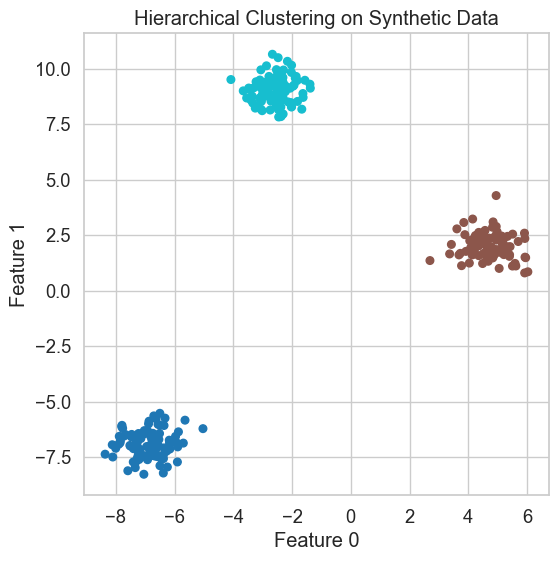

Silhouette Score: 0.9083834454815235


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Generate synthetic dataset
X_synth, y_synth = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Fit hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_synth = hc.fit_predict(X_synth)

# Visualise
plt.figure(figsize=(6,6))
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=labels_synth, cmap="tab10", s=30)
plt.title("Hierarchical Clustering on Synthetic Data")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# Evaluate
print("Silhouette Score:", silhouette_score(X_synth, labels_synth))


### 🌿 Dendrogram

The dendrogram represents the hierarchical merging of clusters based on their distance.

- Each leaf represents a data point (or cluster of points).
- The height of each U-shaped link represents the **distance** (or dissimilarity) between merged clusters.
- By drawing a horizontal line across the dendrogram, you can "cut" it at a chosen height to determine the number of clusters.

In our case, we used **Ward linkage**, which merges clusters to minimize variance within each cluster.


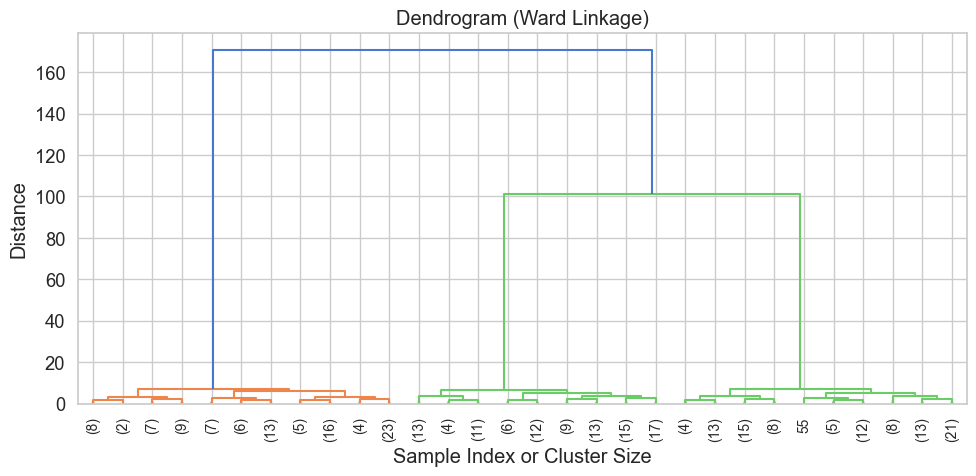

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using Ward's method
linked = linkage(X_synth, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


## Clustering the Wine Dataset

We’ll now apply hierarchical clustering to the Wine dataset, which includes 13 chemical features of wines from 3 different grape cultivars.

Our goal is to see if hierarchical clustering can discover meaningful groupings in the data, without using the true labels.


In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and scale the data
wine = load_wine()
X_raw = wine.data
y_true = wine.target
feature_names = wine.feature_names

scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Create DataFrame
df_wine = pd.DataFrame(X_raw, columns=feature_names)
df_wine["Target"] = y_true
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Hyperparameter: Number of Clusters (`n_clusters`)

This parameter determines how many clusters to extract from the dendrogram.

- If `n_clusters` is too low, very different groups may be merged together.
- If it’s too high, the algorithm might break up natural clusters into smaller subgroups.
- The **Silhouette Score** can help us pick a good value by balancing cohesion and separation.

We will test a range of `n_clusters` values and select the best one using Silhouette Score.


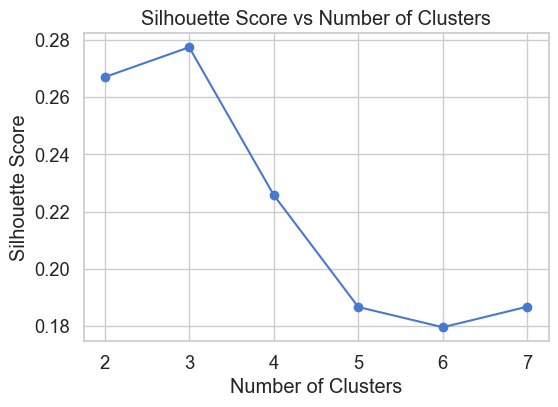

In [4]:
cluster_range = range(2, 8)
results_k = []

for k in cluster_range:
    hc = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = hc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_k.append((k, score))

df_k = pd.DataFrame(results_k, columns=["n_clusters", "Silhouette Score"])
df_k

plt.figure(figsize=(6,4))
plt.plot(df_k["n_clusters"], df_k["Silhouette Score"], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()



## Hyperparameter: Linkage Method (`linkage`)

The `linkage` method controls how the distance between clusters is defined when merging them:

- `"ward"`: minimizes the total within-cluster variance (works only with Euclidean distance)
- `"complete"`: uses the maximum pairwise distance (tends to create compact clusters)
- `"average"`: uses the average pairwise distance
- `"single"`: uses the minimum pairwise distance (can lead to chaining effects)

Different linkage strategies can lead to very different cluster shapes and behaviours.


### 🔗 Ward Linkage (Variance Minimization)

**Ward linkage** is a popular method used in hierarchical (agglomerative) clustering. Unlike other linkage methods that rely purely on distances between points, Ward's method focuses on **minimizing the variance within each cluster**.

At each step, it merges the pair of clusters that results in the **smallest possible increase in the total within-cluster variance**, also known as **inertia**.

#### 🧮 Inertia Formula:

The within-cluster sum of squares (inertia) is given by:

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $k$ is the number of clusters
- $x$ is a data point in cluster $C_i$
- $\mu_i$ is the centroid of cluster $C_i$
- $\| x - \mu_i \|^2$ is the squared Euclidean distance

#### ✅ Characteristics:
- Produces **compact, spherical clusters**
- Similar to what K-Means produces
- Tends to avoid chaining and imbalanced cluster sizes

#### ⚠️ Limitation:
Ward linkage **only supports Euclidean distance**, since it is based on variance and centroids.

---

**In summary:**  
Ward linkage is a strong default choice for hierarchical clustering when you expect well-separated, compact clusters and are working in Euclidean space.


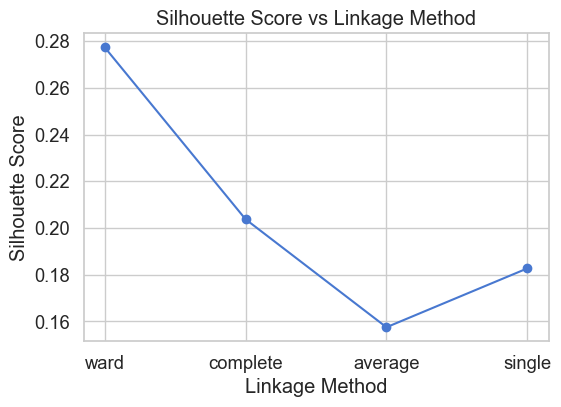

In [5]:
linkage_methods = ["ward", "complete", "average", "single"]
results_linkage = []

for method in linkage_methods:
    if method == "ward":
        hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = hc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_linkage.append((method, score))

df_linkage = pd.DataFrame(results_linkage, columns=["Linkage", "Silhouette Score"])
df_linkage

plt.figure(figsize=(6,4))
plt.plot(df_linkage["Linkage"], df_linkage["Silhouette Score"], marker='o')
plt.xlabel("Linkage Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Linkage Method")
plt.grid(True)
plt.show()


## Hyperparameter: Distance Metric (`metric`)

The `metric` parameter determines **how distances between samples are calculated**.

- `"euclidean"`: default for most use cases and required with `ward` linkage
- `"manhattan"`: based on city-block distance
- `"cosine"`: based on angular distance (useful for text or directional data)

Not all metric values are compatible with all linkage methods. For example, `ward` only works with `euclidean`.

We'll try a few combinations of `metric` and `linkage` to see how they impact clustering results.


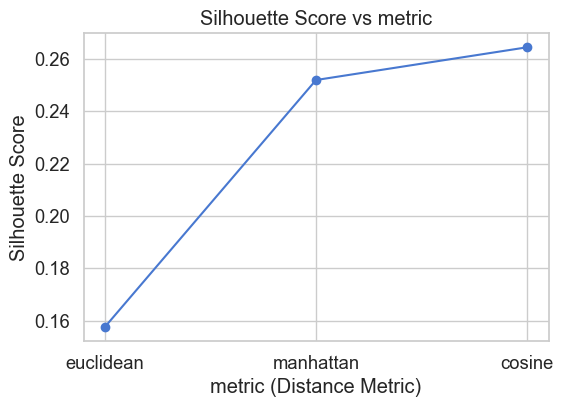

In [6]:
metric_methods = ["euclidean", "manhattan", "cosine"]
results_metric = []

for metric in metric_methods:
    hc = AgglomerativeClustering(n_clusters=3, linkage="average", metric=metric)
    labels = hc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_metric.append((metric, score))

df_metric = pd.DataFrame(results_metric, columns=["metric", "Silhouette Score"])
df_metric

plt.figure(figsize=(6,4))
plt.plot(df_metric["metric"], df_metric["Silhouette Score"], marker='o')
plt.xlabel("metric (Distance Metric)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs metric")
plt.grid(True)
plt.show()


### Final Model and Evaluation

Based on our tests, we’ll use the best combination of:
- `n_clusters = 3`
- `linkage = ward`
- `metric = euclidean`

Let’s run the final clustering and evaluate its silhouette score and compare clusters with true wine cultivars.


In [7]:
hc_final = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
final_labels = hc_final.fit_predict(X)

# Silhouette score
score_final = silhouette_score(X, final_labels)
print("Final Silhouette Score:", score_final)

# Cluster composition table
df_compare = pd.DataFrame({
    "True Label": y_true,
    "Cluster": final_labels
})

composition = pd.crosstab(df_compare["Cluster"], df_compare["True Label"],
                          rownames=["Cluster"], colnames=["True Cultivar"])
composition


Final Silhouette Score: 0.2774439826952266


True Cultivar,0,1,2
Cluster,,,
0,0,58,0
1,0,8,48
2,59,5,0
